# Linear Regression Example 

In [ ]:
# we need to import everything we need first
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# initialize a Dataframe 'df' with some dummy values
# Dummy values are in the  csv file, the string in the read_csv() represents where our csv file is located
# you can change the string path in the read_csv() to import the csv file from different folder
df = pd.read_csv('Linear_Reg_Sales.csv')
df.head() # show the first 5 pairs

,Advert,Sales
0,100,1000
1,200,1900
2,300,2900
3,400,4600
4,500,5300


In [3]:
df.tail() # show the last 5 pairs

,Advert,Sales
10,1100,11222
11,1200,12333
12,1300,13444
13,1400,14555
14,1500,15662


In [4]:
# Show how many rows and columns our data has
# df_hc has 15 rows and 2 columns
print(df.shape)

(15, 2)


In [5]:
# import seaborn for plotting
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline

## Visualize 
We visualize the data using seaborn built in plotting function

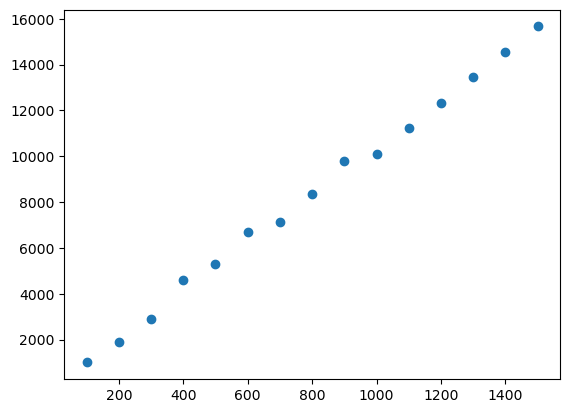

In [6]:
plt.scatter(df.Advert, df.Sales)
# plt.plot(df.Advert, df.Sales, color='red')
plt.show()

# Model Training

In [7]:
from sklearn.model_selection import train_test_split

advert = df[['Advert']]
sales = df['Sales'] # This is the same as
sales = df.Sales

print(advert)

# default split ratio is 25% for test set
# let say we want the split ration to be 20% for test set
x_train, x_test, y_train, y_test = train_test_split(advert,sales, test_size=0.2, random_state = 42)


    Advert
0      100
1      200
2      300
3      400
4      500
5      600
6      700
7      800
8      900
9     1000
10    1100
11    1200
12    1300
13    1400
14    1500


In [8]:
print(x_train.shape) # x_train and x_test shape should be 2D array
print(x_test.shape)

(12, 1)
(3, 1)


In [9]:
x_train.head()

,Advert
13,1400
5,600
8,900
2,300
1,200


In [10]:
# import model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

# fit out linear model to the train set data
linReg.fit(x_train, y_train)

LinearRegression()

# Model Validation

We want to see how well our model fits the data. 
r2-score should be as close to 1 as possible

In [11]:
# print the intercept and coefficients
print(linReg.intercept_)
print(linReg.coef_)

87.29079415250999
[10.35747531]


In [12]:
from sklearn.metrics import r2_score

In [13]:
y_pred = linReg.predict(x_test) 
print('r2_score: ',r2_score(y_test, y_pred)) 
# Compare the value with linReg.score().  Is the score the same as model.score?
print('score: ',linReg.score(x_test,y_test))

r2_score:  0.9974438256330458
score:  0.9974438256330458


# Prediction

In [14]:
print(linReg.predict([[1600]]))  # predicting the sales when the advertisment is 1600
                                # note: we are using double square brackets because we need a 2D array as input

[16659.25128408]


c:\Users\lctan\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
linReg.coef_ * 1600 + linReg.intercept_ # y=mx+b

array([16659.25128408])

Create a dataframe with values for prediction

In [16]:
df1 = pd.DataFrame ({
    "Advert": [1000,2000]
})
linReg.predict( df1[['Advert']]) # predict the sales of the array of advertisement value

array([10444.76610036, 20802.24140656])